<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных." data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных.</a></span></li><li><span><a href="#Объединение-данных." data-toc-modified-id="Объединение-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Объединение данных.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных.</a></span></li><li><span><a href="#Анализ-корелляций-объединённого-датафрейма." data-toc-modified-id="Анализ-корелляций-объединённого-датафрейма.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ корелляций объединённого датафрейма.</a></span></li><li><span><a href="#Разделение-данных-на-две-выборки." data-toc-modified-id="Разделение-данных-на-две-выборки.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Разделение данных на две выборки.</a></span></li><li><span><a href="#Кодирование." data-toc-modified-id="Кодирование.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Кодирование.</a></span></li><li><span><a href="#Обучение-моделей-машинного-обучения." data-toc-modified-id="Обучение-моделей-машинного-обучения.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Обучение моделей машинного обучения.</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке." data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке.-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке.</a></span></li><li><span><a href="#Анализ-лучшей-модели." data-toc-modified-id="Анализ-лучшей-модели.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Анализ лучшей модели.</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

# Описание проекта: телекоммуникации.

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Моя задача — обучить на этих данных модель для прогноза оттока клиентов.

### Загрузка данных.
Загрузим данные и выполним их первичный осмотр.

In [1]:
# Загрузим все нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Установка библиотеки phik
!pip install phik
import phik

RANDOM_STATE = 111223

     |████████████████████████████████| 679 kB 2.5 MB/s eta 0:00:01


In [2]:
# Загрузка данных
contract_data = pd.read_csv('/datasets/contract_new.csv')
personal_data = pd.read_csv('/datasets/personal_new.csv')
internet_data = pd.read_csv('/datasets/internet_new.csv')
phone_data = pd.read_csv('/datasets/phone_new.csv')

In [3]:
# Исследование данных для contract_data (информация о договоре).
print("Contract Data - Head:")
print(contract_data.head(5))

print("\nContract Data - Info:")
print(contract_data.info())

# Проверка на дубликаты
duplicate_rows = contract_data[contract_data.duplicated()]
print("\nКоличество дубликатов в Contract Data:", duplicate_rows.shape[0])

Contract Data - Head:
   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5  

Contract Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------          

**1. Описание данных:**

**customerID** — идентификатор абонента  
**BeginDate** — дата начала действия договора  
**EndDate** — дата окончания действия договора  
**Type** — тип оплаты: раз в год-два или ежемесячно  
**PaperlessBilling** — электронный расчётный лист  
**PaymentMethod** — тип платежа  
**MonthlyCharges** — расходы за месяц  
**TotalCharges** — общие расходы абонента.  

**2. Информация о данных:**

7043 записей.  
Пропущенных значений нет.  
Тип данных: 1 столбец с числовыми данными (MonthlyCharges), 7 столбцов с данными типа "object".  

**3. Описательная статистика:**

Средние ежемесячные расходы абонентов составляют около 64.76.   
Минимальные расходы в месяц - 18.25, максимальные - 118.75.    
Большинство абонентов имеют ежемесячные расходы в интервале от 35.50 до 89.85.    

**4. Проверка на дубликаты:**  

Дубликатов не обнаружено.  

In [4]:
# Исследование данных для personal_data (персональные данные клиента).
print("\nPersonal Data - Head:")
print(personal_data.head(5))

print("\nPersonal Data - Info:")
print(personal_data.info())

# Проверка на дубликаты
duplicate_rows_personal = personal_data[personal_data.duplicated()]
print("\nКоличество дубликатов в Personal Data:", duplicate_rows_personal.shape[0])


Personal Data - Head:
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

Personal Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Количество дубликатов в Personal Data: 0


**1. Описание данных:**

**customerID** — идентификатор абонента   
**gender** — пол (Male/Female)    
**SeniorCitizen** — является ли абонент пенсионером (0 - нет, 1 - да)  
**Partner** — есть ли у абонента супруг или супруга (Yes/No)  
**Dependents** — есть ли у абонента дети (Yes/No).  

**2. Информация о данных:**

7043 записей.  
Пропущенных значений нет.  
Тип данных: 1 столбец с числовыми данными (SeniorCitizen), 4 столбца с данными типа "object".  

**3. Описательная статистика:**  

Примерно 16% абонентов являются пенсионерами.  
Минимальное и максимальное значения в столбце SeniorCitizen - 0 и 1 соответственно.  

**4. Проверка на дубликаты:**  

Дубликатов не обнаружено.  

In [5]:
# Исследование данных для internet_data (информация об интернет-услугах)
print("\nInternet Data - Head:")
print(internet_data.head(5))

print("\nInternet Data - Info:")
print(internet_data.info())

print("\nInternet Data - Describe:")
print(internet_data.describe())

# Проверка на дубликаты
duplicate_rows_internet = internet_data[internet_data.duplicated()]
print("\nКоличество дубликатов в Internet Data:", duplicate_rows_internet.shape[0])


Internet Data - Head:
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  

Internet Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        

**1. Описание данных:**  

**customerID** — идентификатор абонента  
**InternetService** — тип подключения (DSL/Fiber optic)  
**OnlineSecurity** — блокировка опасных сайтов (Yes/No)  
**OnlineBackup** — облачное хранилище файлов для резервного копирования данных (Yes/No)  
**DeviceProtection** — антивирус (Yes/No)  
**TechSupport** — выделенная линия технической поддержки (Yes/No)  
**StreamingTV** — стриминговое телевидение (Yes/No)  
**StreamingMovies** — каталог фильмов (Yes/No).  

**2. Информация о данных:**    

5517 записей.    
Пропущенных значений нет.    
Тип данных: все столбцы типа "object".    

**3. Описательная статистика:**

Преобладающий тип подключения - Fiber optic.    
Большинство абонентов не используют дополнительные услуги, такие как блокировка опасных сайтов, облачное хранилище файлов, антивирус.    

**4. Проверка на дубликаты:**  

Дубликатов не обнаружено.    

In [6]:
# Исследование данных для phone_data
print("\nPhone Data - Head:")
print(phone_data.head(5))

print("\nPhone Data - Info:")
print(phone_data.info())

# Проверка на дубликаты
duplicate_rows_phone = phone_data[phone_data.duplicated()]
print("\nКоличество дубликатов в Phone Data:", duplicate_rows_phone.shape[0])


Phone Data - Head:
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Phone Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Количество дубликатов в Phone Data: 0


**1. Описание данных:**    

**customerID** — идентификатор абонент.  
**MultipleLines** — подключение телефона к нескольким линиям одновременно (Yes/No).  

**2. Информация о данных:**    

6361 записей.  
Пропущенных значений нет.  
Тип данных: оба столбца типа "object".  

**3. Описательная статистика:**  

Примерно 53% абонентов не имеют возможности подключения телефона к нескольким линиям одновременно.  

**4. Проверка на дубликаты:**  

Дубликатов не обнаружено.  

### Исследовательский анализ и предобработка данных.

Выполним исследовательский анализ каждого датафрейма и при необходимости сделаем предобработку. Сделаем выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

In [7]:
# Заменить пустые строки на NaN
contract_data['TotalCharges'] = contract_data['TotalCharges'].replace('', np.nan)

# Преобразовать столбец 'TotalCharges' в числовой тип
contract_data['TotalCharges'] = pd.to_numeric(contract_data['TotalCharges'], errors='coerce')

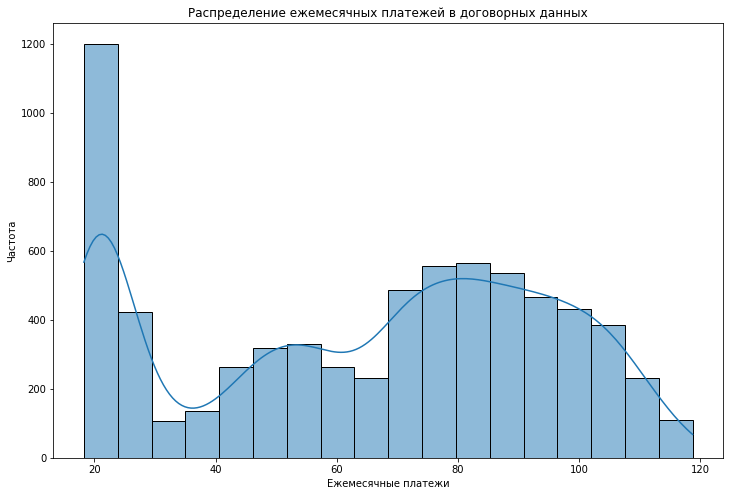

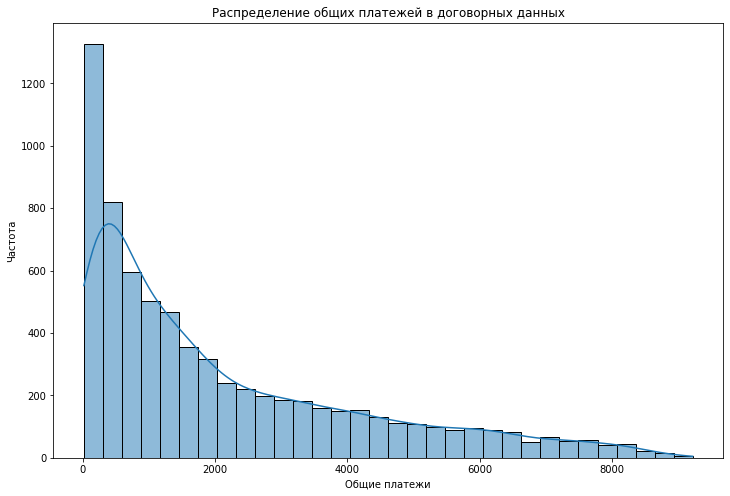

In [8]:
# Визуализация распределения месячных платежей
plt.figure(figsize=(12, 8))
sns.histplot(contract_data['MonthlyCharges'], kde=True)
plt.title('Распределение ежемесячных платежей в договорных данных')
plt.xlabel('Ежемесячные платежи')
plt.ylabel('Частота')
plt.show()

# Визуализация распределения общих платежей
plt.figure(figsize=(12, 8))
sns.histplot(contract_data['TotalCharges'], kde=True)
plt.title('Распределение общих платежей в договорных данных')
plt.xlabel('Общие платежи')
plt.ylabel('Частота')
plt.show()

In [9]:
# Вывод данных describe для месячных платежей и общих платежей
print("Describe для месячных платежей:")
print(contract_data['MonthlyCharges'].describe())

print("\nDescribe для общих платежей:")
print(contract_data['TotalCharges'].describe())

Describe для месячных платежей:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Describe для общих платежей:
count    7032.000000
mean     2118.621822
std      2112.736199
min        19.050000
25%       439.745000
50%      1345.275000
75%      3239.317500
max      9221.380000
Name: TotalCharges, dtype: float64


**Анализ месячных платежей:**
- Средний ежемесячный платеж составляет приблизительно 64.76 доллара, с минимальным значением в 18.25 доллара и максимальным в 118.75 доллара.
- Распределение ежемесячных платежей имеет достаточно высокий стандартный разброс (std = 30.09 доллара), что указывает на значительное разнообразие в платежах между клиентами.
- 25% клиентов платят менее 35.50 долларов в месяц, в то время как 75% платят менее 89.85 долларов.
- Медианное значение (50%) для месячных платежей равно 70.35 доллара, что может служить хорошим показателем центральной тенденции.

**Анализ общих платежей:**
- Среднее значение общих платежей составляет приблизительно 2118.62 доллара, с минимальным значением в 19.05 доллара и максимальным в 9221.38 доллара.
- Аналогично месячным платежам, общие платежи имеют высокий стандартный разброс (std = 2112.74 доллара), что указывает на значительное разнообразие в общих платежах клиентов.
- 25% клиентов имеют общие платежи менее 439.75 долларов, в то время как 75% менее 3239.32 долларов.
- Медианное значение (50%) для общих платежей равно 1345.28 доллара, что может служить показателем центральной тенденции, но также отражает наличие значительного разброса в данных.

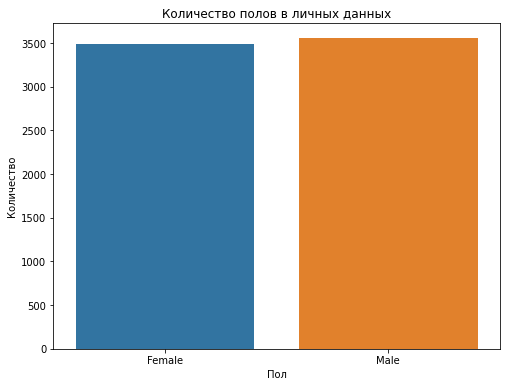

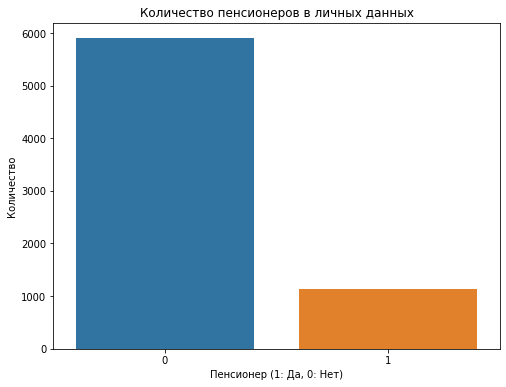

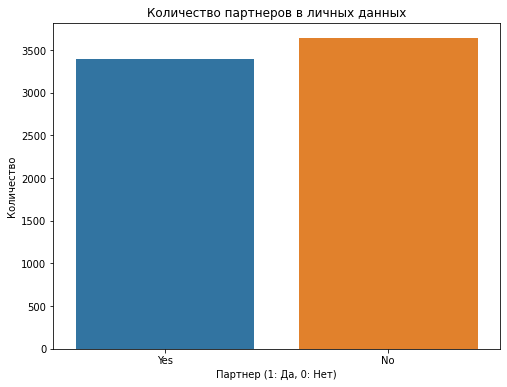

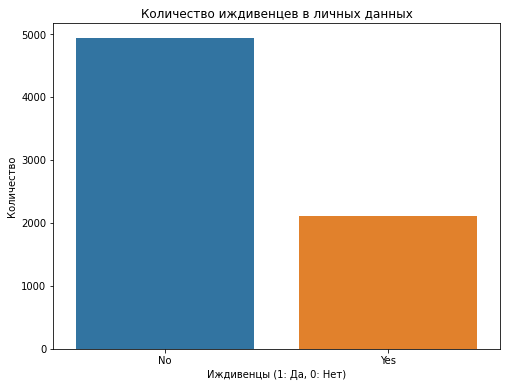

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=personal_data, x='gender')
plt.title('Количество полов в личных данных')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=personal_data, x='SeniorCitizen')
plt.title('Количество пенсионеров в личных данных')
plt.xlabel('Пенсионер (1: Да, 0: Нет)')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=personal_data, x='Partner')
plt.title('Количество партнеров в личных данных')
plt.xlabel('Партнер (1: Да, 0: Нет)')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=personal_data, x='Dependents')
plt.title('Количество иждивенцев в личных данных')
plt.xlabel('Иждивенцы (1: Да, 0: Нет)')
plt.ylabel('Количество')
plt.show()

In [11]:
# Количество уникальных значений и их частота для признака 'gender'
gender_counts = personal_data['gender'].value_counts()

# Количество уникальных значений и их частота для признака 'SeniorCitizen'
senior_citizen_counts = personal_data['SeniorCitizen'].value_counts()

# Количество уникальных значений и их частота для признака 'Partner'
partner_counts = personal_data['Partner'].value_counts()

# Количество уникальных значений и их частота для признака 'Dependents'
dependents_counts = personal_data['Dependents'].value_counts()

# Количество полов
gender_counts = personal_data['gender'].value_counts()
print("Количество полов:")
print(gender_counts)

# Количество пенсионеров
senior_citizen_counts = personal_data['SeniorCitizen'].value_counts()
print("\nКоличество пенсионеров:")
print(senior_citizen_counts)

# Количество клиентов с партнерами
partner_counts = personal_data['Partner'].value_counts()
print("\nКоличество клиентов с партнерами:")
print(partner_counts)

# Количество клиентов с иждивенцами
dependents_counts = personal_data['Dependents'].value_counts()
print("\nКоличество клиентов с иждивенцами:")
print(dependents_counts)


Количество полов:
Male      3555
Female    3488
Name: gender, dtype: int64

Количество пенсионеров:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Количество клиентов с партнерами:
No     3641
Yes    3402
Name: Partner, dtype: int64

Количество клиентов с иждивенцами:
No     4933
Yes    2110
Name: Dependents, dtype: int64


**Анализ признаков в личных данных:**
- **Пол (Gender):** В данных представлены как мужчины (Male), так и женщины (Female). Примерно равное распределение, с небольшим преимуществом у мужчин (3555 против 3488).
- **Пенсионер (Senior Citizen):** Большинство клиентов не являются пенсионерами (0 - 5901), в то время как 1142 клиента являются пенсионерами (1).
- **Партнер (Partner):** Есть примерно равное количество клиентов, у которых есть партнер (Yes - 3402), и тех, у кого нет (No - 3641).
- **Иждивенцы (Dependents):** Большинство клиентов не имеют иждивенцев (No - 4933), но также есть значительное количество клиентов с иждивенцами (Yes - 2110).

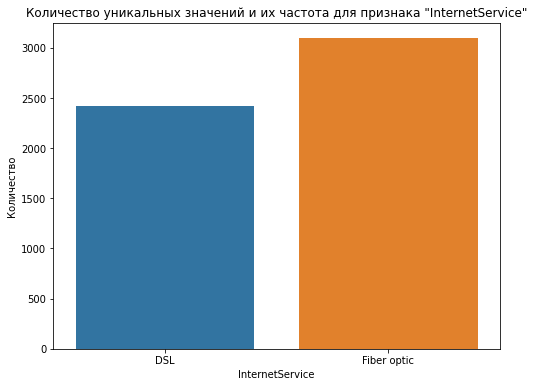

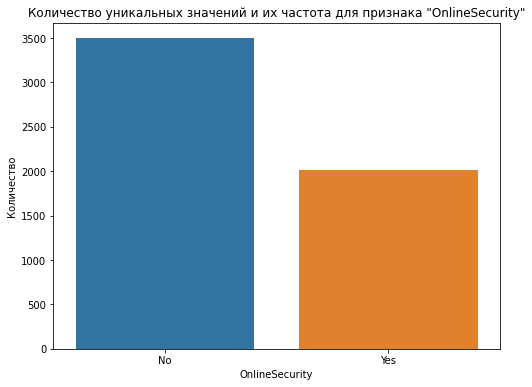

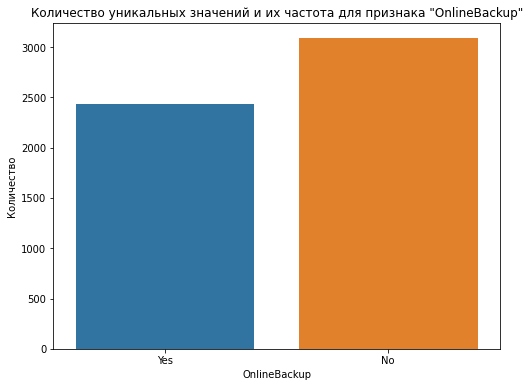

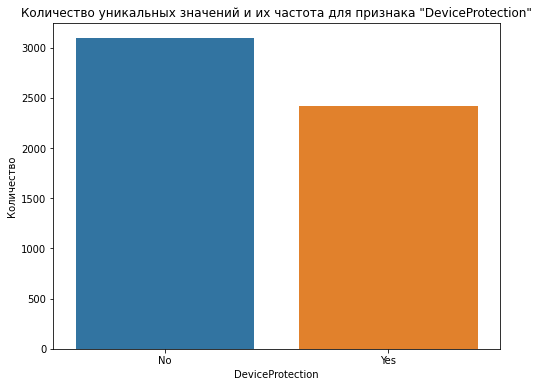

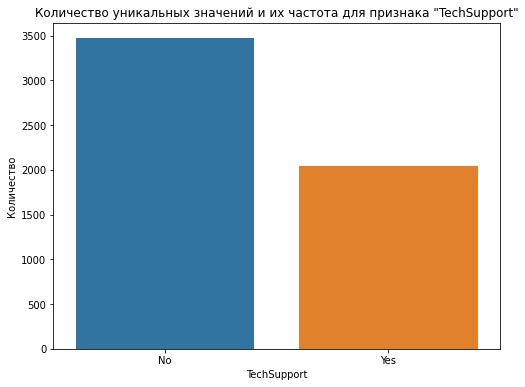

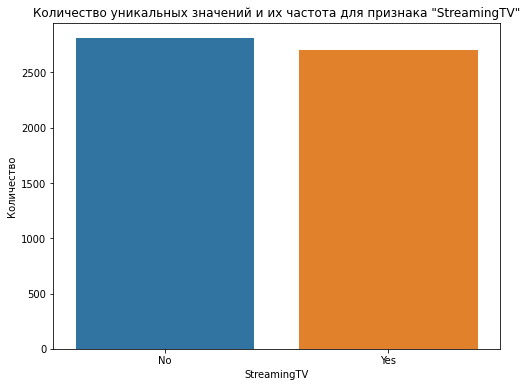

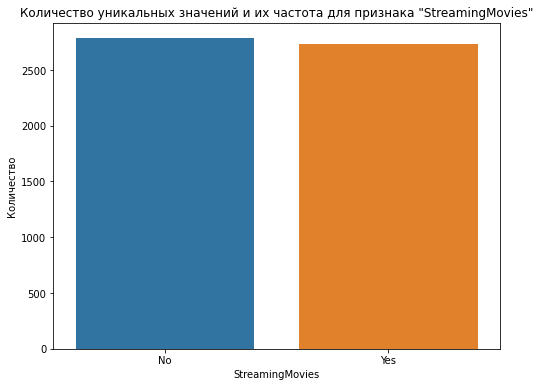

In [12]:
# Количество уникальных значений и их частота для признака 'InternetService'
internet_service_counts = internet_data['InternetService'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_data, x='InternetService')
plt.title('Количество уникальных значений и их частота для признака "InternetService"')
plt.xlabel('InternetService')
plt.ylabel('Количество')
plt.show()

# Количество уникальных значений и их частота для признака 'OnlineSecurity'
online_security_counts = internet_data['OnlineSecurity'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_data, x='OnlineSecurity')
plt.title('Количество уникальных значений и их частота для признака "OnlineSecurity"')
plt.xlabel('OnlineSecurity')
plt.ylabel('Количество')
plt.show()

# Количество уникальных значений и их частота для признака 'OnlineBackup'
online_backup_counts = internet_data['OnlineBackup'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_data, x='OnlineBackup')
plt.title('Количество уникальных значений и их частота для признака "OnlineBackup"')
plt.xlabel('OnlineBackup')
plt.ylabel('Количество')
plt.show()

# Количество уникальных значений и их частота для признака 'DeviceProtection'
device_protection_counts = internet_data['DeviceProtection'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_data, x='DeviceProtection')
plt.title('Количество уникальных значений и их частота для признака "DeviceProtection"')
plt.xlabel('DeviceProtection')
plt.ylabel('Количество')
plt.show()

# Количество уникальных значений и их частота для признака 'TechSupport'
tech_support_counts = internet_data['TechSupport'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_data, x='TechSupport')
plt.title('Количество уникальных значений и их частота для признака "TechSupport"')
plt.xlabel('TechSupport')
plt.ylabel('Количество')
plt.show()

# Количество уникальных значений и их частота для признака 'StreamingTV'
streaming_tv_counts = internet_data['StreamingTV'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_data, x='StreamingTV')
plt.title('Количество уникальных значений и их частота для признака "StreamingTV"')
plt.xlabel('StreamingTV')
plt.ylabel('Количество')
plt.show()

# Количество уникальных значений и их частота для признака 'StreamingMovies'
streaming_movies_counts = internet_data['StreamingMovies'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
sns.countplot(data=internet_data, x='StreamingMovies')
plt.title('Количество уникальных значений и их частота для признака "StreamingMovies"')
plt.xlabel('StreamingMovies')
plt.ylabel('Количество')
plt.show()



In [13]:
# Количество уникальных значений и их частота для признака 'InternetService'
internet_service_counts = internet_data['InternetService'].value_counts()

# Вывод результатов
print("Уникальные значения и их частота для признака 'InternetService':")
print(internet_service_counts)

# Количество уникальных значений и их частота для признака 'OnlineSecurity'
online_security_counts = internet_data['OnlineSecurity'].value_counts()

# Вывод результатов
print("\nУникальные значения и их частота для признака 'OnlineSecurity':")
print(online_security_counts)

# Количество уникальных значений и их частота для признака 'OnlineBackup'
online_backup_counts = internet_data['OnlineBackup'].value_counts()

# Вывод результатов
print("\nУникальные значения и их частота для признака 'OnlineBackup':")
print(online_backup_counts)

# Количество уникальных значений и их частота для признака 'DeviceProtection'
device_protection_counts = internet_data['DeviceProtection'].value_counts()

# Вывод результатов
print("\nУникальные значения и их частота для признака 'DeviceProtection':")
print(device_protection_counts)

# Количество уникальных значений и их частота для признака 'TechSupport'
tech_support_counts = internet_data['TechSupport'].value_counts()

# Вывод результатов
print("\nУникальные значения и их частота для признака 'TechSupport':")
print(tech_support_counts)

# Количество уникальных значений и их частота для признака 'StreamingTV'
streaming_tv_counts = internet_data['StreamingTV'].value_counts()

# Вывод результатов
print("\nУникальные значения и их частота для признака 'StreamingTV':")
print(streaming_tv_counts)

# Количество уникальных значений и их частота для признака 'StreamingMovies'
streaming_movies_counts = internet_data['StreamingMovies'].value_counts()

# Вывод результатов
print("\nУникальные значения и их частота для признака 'StreamingMovies':")
print(streaming_movies_counts)

Уникальные значения и их частота для признака 'InternetService':
Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

Уникальные значения и их частота для признака 'OnlineSecurity':
No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

Уникальные значения и их частота для признака 'OnlineBackup':
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

Уникальные значения и их частота для признака 'DeviceProtection':
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

Уникальные значения и их частота для признака 'TechSupport':
No     3473
Yes    2044
Name: TechSupport, dtype: int64

Уникальные значения и их частота для признака 'StreamingTV':
No     2810
Yes    2707
Name: StreamingTV, dtype: int64

Уникальные значения и их частота для признака 'StreamingMovies':
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64


**Тип интернет-сервиса (InternetService):** В данных присутствуют два основных типа интернет-сервиса: Fiber optic (3096) и DSL (2421). Fiber optic является более популярным среди клиентов.

**Онлайн безопасность (OnlineSecurity):** Большинство клиентов не используют онлайн-безопасность (No - 3498), в то время как 2019 клиентов предпочитают этот сервис (Yes).

**Резервное копирование онлайн (OnlineBackup):** Около половины клиентов не используют резервное копирование онлайн (No - 3088), но также существует значительная группа, предпочитающая это (Yes - 2429).

**Защита устройства (DeviceProtection):** Подавляющее большинство клиентов не использует защиту устройства (No - 3095), но также есть заметная группа, которая выбирает этот сервис (Yes - 2422).

**Техническая поддержка (TechSupport):** Большинство клиентов не используют техническую поддержку (No - 3473), в то время как 2044 клиента предпочитают этот сервис (Yes).

**Стриминг ТВ (StreamingTV):** Распределение клиентов между использованием и неиспользованием стриминга ТВ примерно равномерное (No - 2810, Yes - 2707).

**Стриминг фильмов (StreamingMovies):** Похоже, что использование стриминга фильмов также распределено примерно поровну (No - 2785, Yes - 2732).

Эти выводы предоставляют обзор предпочтений клиентов по основным услугам интернет-сервиса.

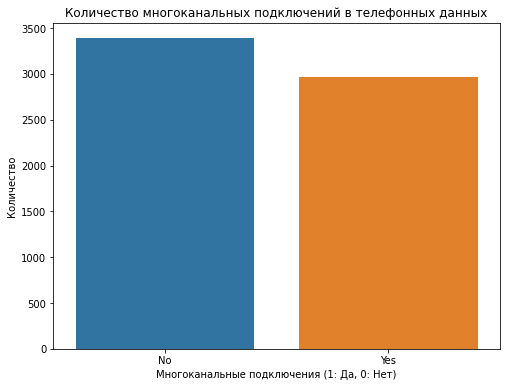

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=phone_data, x='MultipleLines')
plt.title('Количество многоканальных подключений в телефонных данных')
plt.xlabel('Многоканальные подключения (1: Да, 0: Нет)')
plt.ylabel('Количество')
plt.show()

In [15]:
# Уникальные значения и их частота для признака 'MultipleLines'
multiple_lines_counts = phone_data['MultipleLines'].value_counts()

# Вывод результатов
print("Уникальные значения и их частота для признака 'MultipleLines':")
print(multiple_lines_counts)

Уникальные значения и их частота для признака 'MultipleLines':
No     3390
Yes    2971
Name: MultipleLines, dtype: int64


В данных присутствует как клиенты с многоканальными подключениями (Yes - 2971), так и те, у кого только одна линия (No - 3390). Распределение близко к равномерному, с небольшим преимуществом у клиентов без многоканальных подключений.

Посмотрим количество пропусков и выбросы.

In [16]:
# Contract Data
print("Contract Data - Пропуски:")
print(contract_data.isnull().sum())
print("\nContract Data - Аномалии:")
print(contract_data.describe())

# Personal Data
print("\nPersonal Data - Пропуски:")
print(personal_data.isnull().sum())
print("\nPersonal Data - Аномалии:")
print(personal_data.describe())

# Internet Data
print("\nInternet Data - Пропуски:")
print(internet_data.isnull().sum())
print("\nInternet Data - Аномалии:")
print(internet_data.describe())

# Phone Data
print("\nPhone Data - Пропуски:")
print(phone_data.isnull().sum())
print("\nPhone Data - Аномалии:")
print(phone_data.describe())

Contract Data - Пропуски:
customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

Contract Data - Аномалии:
       MonthlyCharges  TotalCharges
count     7043.000000   7032.000000
mean        64.761692   2118.621822
std         30.090047   2112.736199
min         18.250000     19.050000
25%         35.500000    439.745000
50%         70.350000   1345.275000
75%         89.850000   3239.317500
max        118.750000   9221.380000

Personal Data - Пропуски:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Personal Data - Аномалии:
       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

Internet Data - Пропуски:
customerID          0
InternetService     0
Onli

**Вывод:**

Аномалии в данных отсутствуют.

Проверим версию о том, что если клиент только что подключился, у него еще не было возможности сделать платеж, и, следовательно, общие расходы (TotalCharges) могут быть нулевыми.

In [17]:
# Заменяем NaN значения в TotalCharges на 0, если BeginDate равна 1 февраля 2020 года
contract_data.loc[(contract_data['TotalCharges'].isnull()) & (contract_data['BeginDate'] == '2020-02-01'), 'TotalCharges'] = 0

In [18]:
# Проверим пропуски
print("Contract Data - Пропуски:")
print(contract_data.isnull().sum())

Contract Data - Пропуски:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


Теория подтвердилась, заменили значения NaN в столбце TotalCharges на 0.

### Объединение данных.

In [19]:
# Объединение данных по столбцу 'customerID'
merged_data = pd.merge(contract_data, personal_data, on='customerID', how='inner')
merged_data = pd.merge(merged_data, internet_data, on='customerID', how='outer')
merged_data = pd.merge(merged_data, phone_data, on='customerID', how='outer')

# Вывод первых 5 строк и информации о датафрейме
display(merged_data.head())
display(merged_data.info())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


None

**Вывод после объединения в одну таблицу:**

- В объединённой таблице 20 столбцов и 7043 наблюдения. 
- Для столбцов с датами (BeginDate, EndDate) нужно преобразовать формат в datetime. 
- Нужно добавить новый признак "Длительность" (сколько клиент находится в компании). Длительность лучше получить в днях.
- Появившиеся пропущенные значения (NaN) связаны с тем, что не все пользователи пользуются интернетом с телефонной связью одновременно. 
- На следующем этапе предобработки данных мы заполним эти пропуски. 
- Нужно изменить тип данных SeniorCitizen на object а 0 и 1 заменить на Yes и No.

### Предобработка данных.

In [20]:
# Оптимизация типа данных признака "BeginDate"
merged_data['BeginDate'] = pd.to_datetime(merged_data['BeginDate'], format='%Y-%m-%d')

# Оптимизация типа данных признака "EndDate"
merged_data.loc[merged_data['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
merged_data['EndDate'] = pd.to_datetime(merged_data['EndDate'], format='%Y-%m-%d')

# Создаем новый признак "Длительность"
merged_data['Duration'] = (merged_data['EndDate'] - merged_data['BeginDate']).dt.days

# Добавление целевого признака "Target"
merged_data['Target'] = (merged_data['EndDate'] != '2020-02-01').astype(int)

# Удаляем признаки "BeginDate" и "EndDate", так как теперь у нас есть целевой признак "Target"
merged_data.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

Произведена оптимизация типов данных для признаков "BeginDate" и "EndDate". Теперь они представлены в формате datetime64[ns], что позволит эффективнее использовать память и улучшит работу с датами. Кроме того, добавлен новый признак "Duration", отражающий длительность контракта в днях. Эти изменения придают большую удобство обработке данных и готовят их для последующего анализа и моделирования. Признаки BeginDate и EndDate было решено удалить.

Также был добавлен целевой признак Target (отказался ли пользователь от услуг или нет).

In [21]:
# Задаем список столбцов для MultipleLines
phone_data_columns = ['MultipleLines']

# Задаем список столбцов для InternetService, OnlineSecurity, и т.д.
internet_data_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Заменяем пропуски в соответствующих столбцах на 'No' в датафрейме merged_data
merged_data[phone_data_columns] = merged_data[phone_data_columns].fillna('No')
merged_data[internet_data_columns] = merged_data[internet_data_columns].fillna('No')

# Выводим информацию о датасете
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   float64
 6   gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   int64  
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [22]:
# Заменяем значения 0 и 1 на 'No' и 'Yes' в столбце 'SeniorCitizen'
merged_data['SeniorCitizen'] = merged_data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Изменяем тип данных столбца 'SeniorCitizen' на object
merged_data['SeniorCitizen'] = merged_data['SeniorCitizen'].astype(object)

# Выводим информацию о датасете
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   float64
 6   gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   object 
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


**Вывод:**

Произведена предобработка датасета merged_data:

1. Пропущенные значения в столбцах 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' были заменены на 'No'.

2. Столбец 'SeniorCitizen' был изменен на тип данных object, и значения 0 и 1 были заменены на 'No' и 'Yes' соответственно.

3. Произведена оптимизация типов данных для признаков "BeginDate" и "EndDate".

4. Добавлен новый признак "Duration", отражающий длительность контракта в днях.

### Анализ корелляций объединённого датафрейма.

Матрица корреляций Пирсона не подходит для анализа датасетов, в которых присутствуют категориальные или дискретные признаки - по ним корреляций Пирсона не может быть оценена вообще (в случае категориальных) или не может быть оценена корректно (в случае дискретных).

При использовании phik крайне важно настроить параметр interval_cols, передав ему список с названиями непрерывных признаков: если этого не сделать, библиотека своими силами будет пытаться разнести признаки по типам, и она часто делает в этом ошибки - от этого в свою очередь мы получаем некорректную оценку корреляций, так как от типа признака зависит метод оценки корреляции.

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Duration,Target
Type,1.000000,0.106860,0.277462,0.388444,0.470860,0.000000,0.086231,0.179736,0.147680,0.505187,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.065498,0.634155,0.094015
PaperlessBilling,0.106860,1.000000,0.370495,0.467812,0.201703,0.000000,0.242133,0.013218,0.172593,0.231438,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.252972,0.026799,0.083398
PaymentMethod,0.277462,0.370495,1.000000,0.399526,0.335666,0.000000,0.292725,0.243008,0.224903,0.323886,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.339313,0.350964,0.214832
MonthlyCharges,0.388444,0.467812,0.399526,1.000000,0.710905,0.008175,0.304985,0.203545,0.184366,0.919002,0.551621,0.629541,0.667481,0.576525,0.835340,0.833307,0.675883,0.387727,0.226280
TotalCharges,0.470860,0.201703,0.335666,0.710905,1.000000,0.000000,0.135650,0.381958,0.084247,0.490081,0.522090,0.622445,0.640977,0.550065,0.641488,0.643210,0.573191,0.848337,0.302890
gender,0.000000,0.000000,0.000000,0.008175,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.018397,0.009882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008581
SeniorCitizen,0.086231,0.242133,0.292725,0.304985,0.135650,0.000000,1.000000,0.016992,0.324576,0.160702,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.221313,0.063315,0.086159
Partner,0.179736,0.013218,0.243008,0.203545,0.381958,0.000000,0.016992,1.000000,0.652122,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.220101,0.453688,0.226688
Dependents,0.147680,0.172593,0.224903,0.184366,0.084247,0.000000,0.324576,0.652122,1.000000,0.108463,0.124945,0.031533,0.010416,0.096912,0.017331,0.058999,0.033103,0.198729,0.046871
InternetService,0.505187,0.231438,0.323886,0.919002,0.490081,0.000000,0.160702,0.000000,0.108463,1.000000,0.241421,0.233602,0.232916,0.239663,0.272818,0.272782,0.225383,0.060845,0.056621


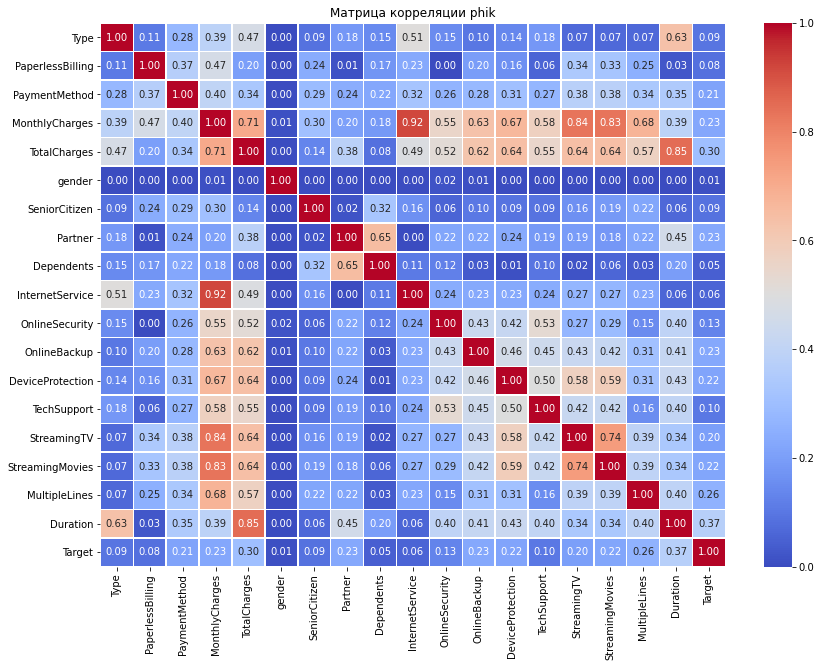

In [23]:
# Удаляем столбец 'customerID' из merged_data
merged_data = merged_data.drop(columns=['customerID'], axis=1)

continuous_features = ['MonthlyCharges', 'TotalCharges', 'Duration']

# Расчет корреляции с использованием phik с явным указанием непрерывных признаков
correlation_matrix_phik = merged_data.phik_matrix(interval_cols=continuous_features)
display(correlation_matrix_phik)

# Визуализация корреляционной матрицы с phik
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_phik, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции phik')
plt.show()

**Вывод:**

1. Duration (0.374569)
2. TotalCharges (0.302890)
3. MonthlyCharges (0.226280)
4. PaymentMethod (0.214832)
5. OnlineBackup (0.229482)
6. StreamingMovies (0.222232)
7. MultipleLines (0.261237)
8. Partner (0.226688)

Эти признаки будут наиболее значимыми для анализа и моделирования в контексте зависимости от целевого признака Target. 

Числовые: Duration, TotalCharges, MonthlyCharges  
Категориальные: PaymentMethod, OnlineBackup, StreamingMovies, MultipleLines, Partner  

### Разделение данных на две выборки.

In [24]:
# Выберем только важные признаки из списка
important_features = [
    'Duration',
    'TotalCharges',
    'MonthlyCharges',
    'PaymentMethod',
    'OnlineBackup',
    'StreamingMovies',
    'MultipleLines',
    'Partner'
]

# Оставим только эти признаки в данных
filtered_data = merged_data[important_features + ['Target']]

# Проверим, что признаки действительно остались
display(filtered_data.head())

,Duration,TotalCharges,MonthlyCharges,PaymentMethod,OnlineBackup,StreamingMovies,MultipleLines,Partner,Target
0,31,31.04,29.85,Electronic check,Yes,No,No,Yes,0
1,1036,2071.84,56.95,Mailed check,No,No,No,No,0
2,123,226.17,53.85,Mailed check,Yes,No,No,No,0
3,1371,1960.60,42.30,Bank transfer (automatic),No,No,No,No,0
4,153,353.50,70.70,Electronic check,No,No,No,No,0


In [25]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = filtered_data.drop('Target', axis=1)
y = filtered_data['Target']

# Разделение на тренировочную и тестовую выборки с процентным соотношением 75% на 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

# Выводим размеры обучающей и тестовой выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

# Вычисляем процентное соотношение
train_percent = (X_train.shape[0] / X.shape[0]) * 100
test_percent = (X_test.shape[0] / X.shape[0]) * 100

print("Процент обучающей выборки:", train_percent, "%")
print("Процент тестовой выборки:", test_percent, "%")

Размер обучающей выборки: 5282
Размер тестовой выборки: 1761
Процент обучающей выборки: 74.99645037626011 %
Процент тестовой выборки: 25.003549623739886 %


**Вывод:**

Данные были разделены на две выборки, теперь мы можем перейти к кодированию.

### Кодирование.

Cоздадим кастомный трансформер, который будет применять различные методы кодирования категориальных и числовых признаков в зависимости от их типа. Мы будем использовать ColumnTransformer из библиотеки sklearn.

In [26]:
# Определим категориальные и числовые признаки
categorical_features = ['PaymentMethod', 'OnlineBackup', 'StreamingMovies', 'MultipleLines', 'Partner']
numeric_features = ['Duration', 'TotalCharges', 'MonthlyCharges']

# Создаем списки преобразований для категориальных и числовых признаков
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Соберем все преобразования в один ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

Теперь можем использовать preprocessor в качестве этапа в нашем Pipeline или моделях.

In [27]:
# Создаем конвейер для обработки признаков
data_preprocessing = Pipeline([
    ('preprocessor', preprocessor)
])

# Применяем трансформер к данным
X_train_transformed = data_preprocessing.fit_transform(X_train)
X_test_transformed = data_preprocessing.transform(X_test)

### Обучение моделей машинного обучения.

In [28]:
# Создаем объект модели для случайного леса
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)

# Создаем объект модели для CatBoost
catboost_model = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)

In [29]:
# Параметры для для RandomForest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20]
}

# Параметры для CatBoost
catboost_params = {
    'iterations': [100, 200, 500],
    'depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.5]
}

In [30]:
# Метрика
score = 'roc_auc'

# GridSearchCV для Random Forest
grid_rf = GridSearchCV(rf_model, rf_params, cv=3, scoring=score)

# GridSearchCV для CatBoost
grid_catboost = GridSearchCV(catboost_model, catboost_params, cv=3, scoring=score)

In [31]:
grid_rf.fit(X_train_transformed, y_train)

# Вывод лучших гиперпараметров и AUC ROC для Random Forest
print("Лучшие гиперпараметры для Random Forest:", grid_rf.best_params_)
print("AUC ROC для Random Forest на кросс-валидации:", grid_rf.best_score_)

Лучшие гиперпараметры для Random Forest: {'max_depth': 10, 'n_estimators': 200}
AUC ROC для Random Forest на кросс-валидации: 0.7954619869045297


In [32]:
grid_catboost.fit(X_train_transformed, y_train)

# Вывод лучших гиперпараметров и AUC ROC для CatBoost
print("\nЛучшие гиперпараметры для CatBoost:", grid_catboost.best_params_)
print("AUC ROC для CatBoost на кросс-валидации:", grid_catboost.best_score_)


Лучшие гиперпараметры для CatBoost: {'depth': 5, 'iterations': 500, 'learning_rate': 0.1}
AUC ROC для CatBoost на кросс-валидации: 0.8972119727389677


**Вывод:**

Мы построили две модели RandomForest и CatBoost, подобрали лучшие гиперпараметры и получили метрику на кросс-валидации с помощью GridSearchCV.

После анализа данных и обучения моделей можно сделать вывод: модель CatBoost с гиперпараметрами depth: 5, iterations: 500, learning_rate: 0.1 показала лучший результат по метрике AUC ROC на кросс-валидации (0.8972) по сравнению с моделью Random Forest, которая достигла значения 0.7954 с параметрами max_depth: 10, n_estimators: 200. С учетом этих результатов, для дальнейшего использования в проекте рекомендуется использовать модель CatBoost.

### Проверка лучшей модели на тестовой выборке.

In [33]:
# Используем лучшие гиперпараметры для создания и обучения модели
best_catboost_model = grid_catboost.best_estimator_

# Делаем предсказания с помощью модели на тестовой выборке
y_pred_best_catboost = best_catboost_model.predict_proba(X_test_transformed)[:, 1]

# Оцениваем качество модели на тестовой выборке с помощью AUC-ROC
test_auc_best_catboost = roc_auc_score(y_test, y_pred_best_catboost)
print(f"AUC-ROC модели CatBoost с лучшими гиперпараметрами на тестовой выборке: {test_auc_best_catboost}")

AUC-ROC модели CatBoost с лучшими гиперпараметрами на тестовой выборке: 0.8961065573770493


**Вывод:**

Модель CatBoost с оптимальными гиперпараметрами показала отличный результат по метрике AUC-ROC на тестовой выборке — 0.896. Это говорит о том, что модель хорошо справляется с задачей классификации и имеет высокую предсказательную способность.

### Анализ лучшей модели.

Матрица ошибок покажет, сколько верных и ошибочных предсказаний сделала модель для каждого из классов. Это поможет оценить, в каких случаях модель совершает ошибки.

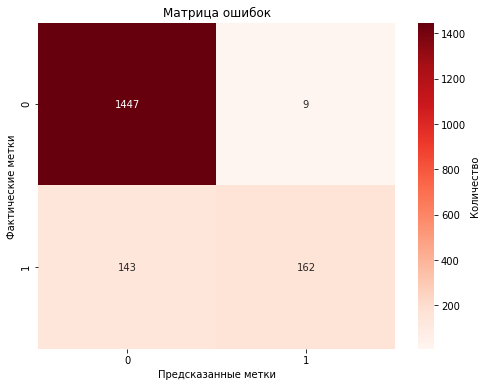

In [56]:
# Преобразуем вероятности в двоичные метки (порог)
y_pred_binary = (y_pred_best_catboost > 0.5).astype(int)

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred_binary)

# Создаем тепловую карту для матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', cbar=True, cbar_kws={'label': 'Количество'})  # Изменил эту строку

plt.xlabel('Предсказанные метки')
plt.ylabel('Фактические метки')
plt.title('Матрица ошибок')

plt.show()

**Вывод:**

В матрице ошибок видно, что модель правильно классифицировала 1447 наблюдений как негативные и 162 наблюдения как позитивные. Однако было 9 ложноположительных и 143 ложноотрицательных предсказаний.

Построим столбчатую диаграмму для анализа важности признаков.

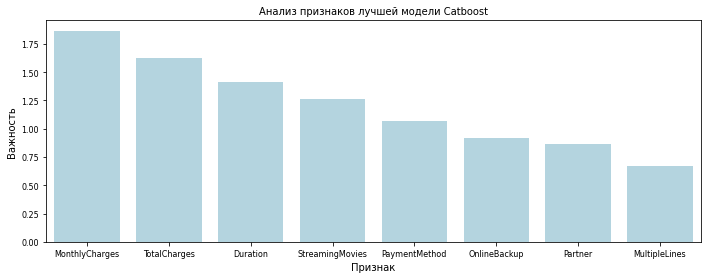

   Важность          Признак
0  1.865234   MonthlyCharges
1  1.624320     TotalCharges
2  1.415392         Duration
3  1.261655  StreamingMovies
4  1.069559    PaymentMethod
5  0.920524     OnlineBackup
6  0.861937          Partner
7  0.670801    MultipleLines


In [57]:
feature_importances = pd.DataFrame(sorted(zip(grid_catboost.best_estimator_.feature_importances_, important_features)), 
                                   columns=['Важность', 'Признак'])

plt.figure(figsize=(10, 4))
sns.barplot(x="Признак", y="Важность", data=feature_importances.sort_values(by="Важность", ascending=False), color='lightblue')

plt.title('Анализ признаков лучшей модели Catboost', size=10)
plt.tight_layout()
plt.xticks(size=8)
plt.yticks(size=8)
plt.show()

# Создаем отсортированную таблицу
sorted_feature_importances = feature_importances.sort_values(by="Важность", ascending=False).reset_index(drop=True)

# Выводим таблицу
print(sorted_feature_importances)

**Вывод:**

На основе анализа важности признаков можно сделать следующие выводы:

1. **MonthlyCharges** и **TotalCharges** наиболее важные признаки с оценками в 1.87 и 1.62 соответственно. Это может указывать на то, что экономические аспекты, связанные с ежемесячными и общими платежами, играют ключевую роль.
  
2. **Duration** и **StreamingMovies** также показывают высокую важность с оценками 1.42 и 1.26. Это может указывать на то, что продолжительность пользования услугой и интерес к потоковому видео влияют на решения клиентов.
  
3. **PaymentMethod**, **OnlineBackup**, **Partner** и **MultipleLines** имеют более низкие оценки важности, что может говорить о их менее значимом вкладе в прогнозирование. Однако они все равно могут предоставлять полезную информацию для модели.

### Общий вывод.

1. В ходе выполнения дипломного проекта были выполнены следующие пункты плана:
- Загрузка данных
- Исследовательский анализ и предобработка данных
- Объединение данных
- Предобработка данных после объединения
- Анализ корелляций объединённого датафрейма
- Разделение данных на две выборки
- Кодирование признаков
- Обучение моделей машинного обучения
- Проверка лучшей модели на тестовой выборке
- Анализ лучшей модели

2. Возникли некоторые трудности с объединением всех датасетов в один.

- А именно: до просмотра встречи было принято решение объединить данные уже после иследовательского анализа, как это указано в плане работы в Практикуме, в связи с этим появилась некоторая громоздкость пункта под номером 2 (Исследовательский анализ).

- Также уже после объединения датасетов не сразу было очевидно что делать с появившимися пропусками. Пропущенные значения в столбцах 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' были заменены на 'No', то есть, пользователь не пользуется соответствующей услугой.

3. Ключевые шаги:

- До объединения таблиц NaN значения в столбце TotalCharges были заменены на 0, если BeginDate равна 1 февраля 2020 года

- Данные были объединены уже в 3 пункте с помощью pd.merge (how='inner' и how='outer'). 

- Добавлен новый признак "Duration", отражающий длительность контракта в днях.

- Добавлен целевой признак Target (отказался ли пользователь от услуг или нет).

- Признаки с датами были удалены, чтобы избежать утечки.

- Анализ корелляций объединённого датафрейма с помощью phik (дополнительно была установлена библиотека), помог нам выбрать наиболее значимые для анализа и моделирования в контексте зависимости от целевого признака Target.

Числовые: Duration, TotalCharges, MonthlyCharges  
Категориальные: PaymentMethod, OnlineBackup, StreamingMovies, MultipleLines, Partner  

- Данные были разделены на тренировочную и тестовую выборки с процентным соотношением 75% на 25%.

- Для обучения были выбраны две модели: RandomForestClassifier и CatBoostClassifier.

- Параметры для RandomForest: n_estimators: 50, 100, 200 и max_depth: 10, 15, 20.

- Параметры для CatBoost: iterations: 100, 200, 500, depth: 5, 10, 15 и learning_rate: 0.01, 0.1, 0.5.

- Была построена матрица ошибок модели и анализ важности каждого признака.

4. Лучшей моделью оказался CatBoost со следующими гиперпараметрами: depth: 5, iterations: 500, и learning_rate: 0.1.

Метрика AUC ROC модели CatBoost с лучшими гиперпараметрами на тестовой выборке равна 0.89, что превышает заданный порог в 0.85.

5. Список признаков, используемых для обучения лучшей модели:  

Duration (длительность контракта в днях) - созданный признак на основе EndDate и BeginDate.
TotalCharges (общие расходы абонента)  
MonthlyCharges (расходы за месяц)  
PaymentMethod (тип платежа)  
OnlineBackup (облачное хранилище файлов для резервного копирования данных)  
StreamingMovies (каталог фильмов)  
MultipleLines (подключение телефона к нескольким линиям одновременно)  
Partner (есть ли у абонента супруг или супруга)  

Важность каждого признака представлена на графике ниже, также он присутствует в 10 пункте моего проекта. Отмечу, что в указанных признаках предобработка кроме заполнения пропусков не выполнялась, так как аномалии и дубликаты в данных отсутствовали.

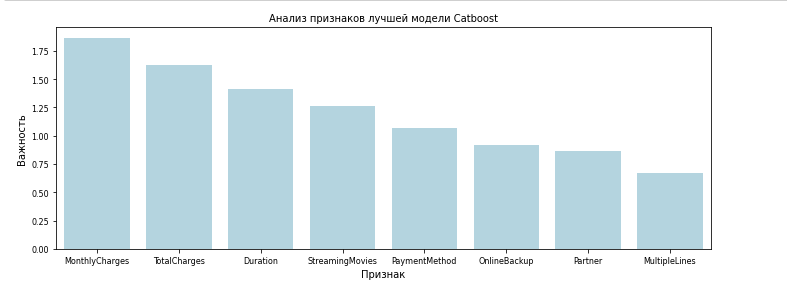